In [1]:
#NumPy creats objects for multidimensional arrays and matrices,to perform advanced mathematical
#and statistical functions on those arrays with as little code as possible.
#SciPy builds on NumPy by adding a collection of algorithms and high-level commands for manipulating and visualizing data.
#Pandas adds data structures and tools that are designed for practical data analysis. 
#Pandas works well with incomplete, messy, and unlabeled data 
#sklearn(scikit-learn) builds on NumPy and SciPy by adding a set of algorithms for common machine learning and data mining tasks, 
#matplotlib is the standard Python library for creating 2D plots and graphs.
import numpy as np
import scipy
import pandas
import sklearn
import matplotlib
import itertools
import pandas as pd

In [2]:
# import metrics for accuracy measures for the performance of the algorithms
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#import machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data, meta = arff.loadarff("D:/cup.arff")
data = pd.DataFrame(data)
#the data set contains 60839 rows and 43 columns
print(data.shape)

(60839, 43)


In [5]:
#list the column names of the dataframe and their data types
data.dtypes

id                             float64
duration                       float64
protocol_type                  float64
service                        float64
flag                           float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromissed               float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbounds_cmds             float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate              

In [6]:
#of 60839 rows , 69593 are rows which are found to be normal and 246 found to be outliers
data['outlier'].value_counts()

0.0    60593
1.0      246
Name: outlier, dtype: int64

In [7]:
#  delete the 'id' column
del data['id']
print(data.shape)

(60839, 42)


In [9]:
#split the data as training set which is 70 % of the data and validation set which is 30%
# 41st column is outlier
array = data.values
X = array[:,0:41]
Y = array[:,41]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=seed)

In [10]:
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(42587L, 41L)
(42587L,)
(18252L, 41L)
(18252L,)


In [11]:
#try the machine learning models one by one on the training set
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandomForest',RandomForestClassifier()))

In [13]:
seed=7
scoring = 'accuracy'

In [14]:
#try the machine learning models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandomForest',RandomForestClassifier()))
#cross validation with kfolds=10
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.998779 (0.000534)
CART: 0.998802 (0.000560)
NB: 0.978468 (0.001871)
SVM: 0.997464 (0.000718)
RandomForest: 0.998896 (0.000482)


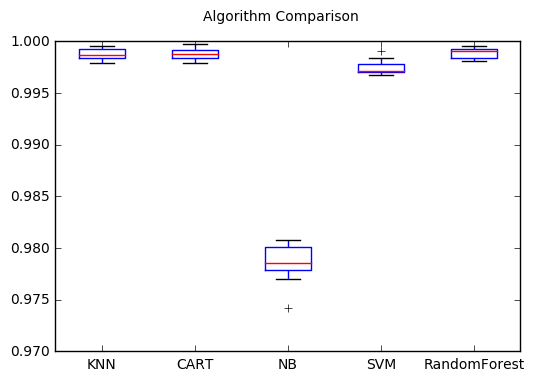

In [15]:
# boxplots for comparison of different algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
# accuracy score is the best in Random forest model.Test the model with test(validation) set.Make predictions on the test data set.
# Make predictions on validation dataset
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, Y_train)
predictions = RandomForest.predict(X_validation)

In [18]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.998794652641
[[18170     4]
 [   18    60]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     18174
        1.0       0.94      0.77      0.85        78

avg / total       1.00      1.00      1.00     18252

